In [2]:
%matplotlib inline 
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

n_samples = 2000
X, y = make_blobs(n_samples, centers=4, n_features=2,
                  random_state=0)

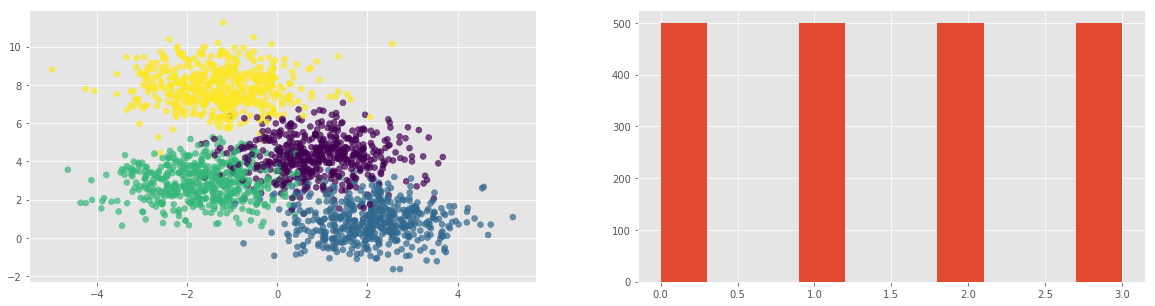

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:,0] , X[:,1],  c = y, alpha = 0.7)
plt.subplot(1, 2, 2)
plt.hist(y)
plt.show()

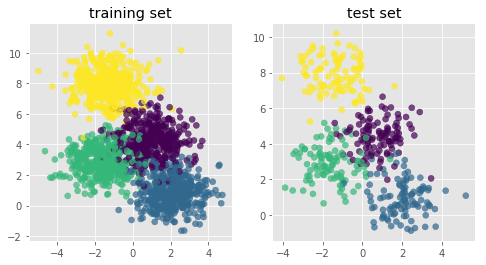

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(8, 4))

ax0.set_title('training set')
ax0.scatter(X_train[:,0] , X_train[:,1],  c = y_train, alpha = 0.7);
ax1.scatter(X_test[:,0] , X_test[:,1], c = y_test, alpha = 0.7);
ax1.set_title('test set')
plt.show()

In [19]:
from sklearn import neighbors, linear_model
from sklearn.metrics import classification_report
knn = neighbors.KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)

y_true,y_pred = y_test, knn_model.predict(X_test)
print(classification_report(y_true,y_pred))


             precision    recall  f1-score   support

          0       0.87      0.90      0.88       106
          1       0.98      0.93      0.95       102
          2       0.90      0.92      0.91       100
          3       1.00      1.00      1.00        92

avg / total       0.94      0.94      0.94       400



In [28]:
# Add noise column to predictor variables
ns = 10**(3) # Strength of noise term
newcol = np.transpose([ns*np.random.randn(n_samples)])
Xn = np.concatenate((X, newcol), axis = 1)
print(Xn[0:3])

[[ -4.65303843e-01   1.73299482e+00  -5.65839721e+02]
 [ -3.39637332e-01   3.84220272e+00  -2.69629933e+02]
 [  2.25309569e+00   9.95414462e-01  -5.53446310e+02]]


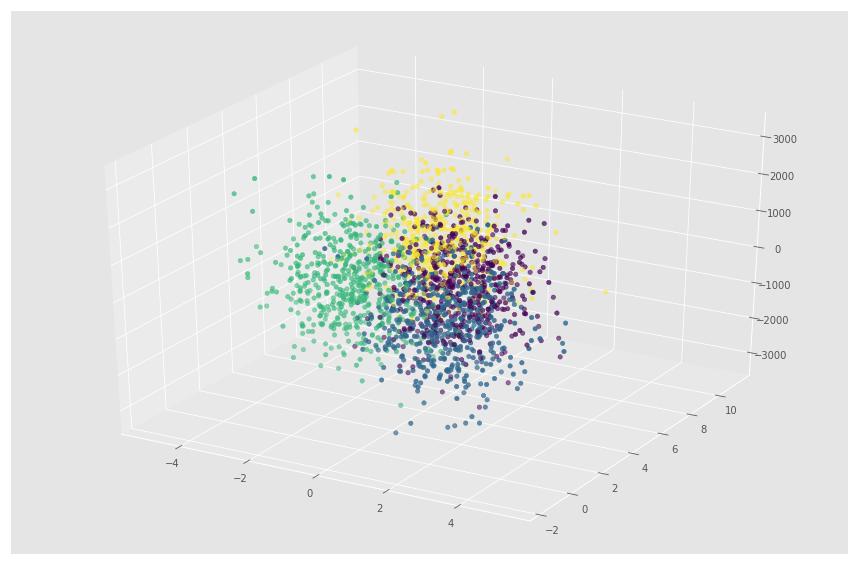

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d',alpha=0.5)
ax.scatter(Xn[:,0],Xn[:,1],Xn[:,2], c = y)

In [30]:
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, random_state=42)
knn = neighbors.KNeighborsClassifier()
knn_model = knn.fit(Xn_train, y_train)
print('k-NN score for test set: %f' % knn_model.score(Xn_test, y_test))

k-NN score for test set: 0.342500


In [32]:
from sklearn.preprocessing import scale

Xns = scale(Xn)
s = int(.2*n_samples)
Xns_train = Xns[s:]
y_train = y[s:]
Xns_test = Xns[:s]
y_test = y[:s]
knn = neighbors.KNeighborsClassifier()
knn_models = knn.fit(Xns_train, y_train)
print('k-NN score for test set: %f' % knn_models.score(Xns_test, y_test))

k-NN score for test set: 0.927500


In [35]:
#ridge regression 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
print((np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis]))
y = np.ones(10)

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]
 [ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]
 [10 11 12 13 14 15 16 17 18 19]]


(200,)
10


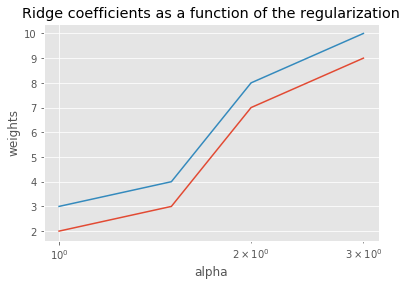

In [56]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
print(alphas.shape)
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
print(len(coefs[0]))
ax = plt.gca()

alphas = np.array([1,1.5,2,3])
coefs = np.array([[2,3],[3,4],[7,8],[9,10]])
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()